In [177]:
import nltk
from nltk import FreqDist, word_tokenize 

import pandas as pd
import numpy as np

from math import pi

from wordcloud import WordCloud

from IPython.display import display
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, BasicTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.transform import cumsum

import matplotlib.pyplot as plt


from collections import Counter

In [178]:
output_notebook()

Loading BokehJS ...

In [179]:
df = pd.read_csv('../DataSet/complete_dataset.csv')
df.head()

,Unnamed: 0,title,text,source,veracity,set,subject,date
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN


In [180]:
j = 0
liste = []
for i in pd.isna(df['text']):
    if i == True:
        liste.append(j)
    j += 1

In [181]:
df = df.drop(liste)

In [182]:
balance = df.groupby('veracity').count().reset_index()
balance

,veracity,Unnamed: 0,title,text,source,set,subject,date
0,False,36725,36038,36725,13244,36725,23481,23481
1,True,28077,28071,28077,28077,28077,11116,11116


In [183]:
options = dict(plot_width=500, plot_height=500,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset, hover",)

balance['angle'] = balance['text']/balance['text'].sum() * 2*pi
balance['color'] = ['#3182bd', '#6baed6']

p = figure(title="Veracity Balance", toolbar_location=None,
           tooltips="@veracity: @text", x_range=(-0.5, 1.0), **options)

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='veracity', source=balance)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [184]:
def length_text(text):
        return len(text)

df['legth_text'] = df['text'].apply(length_text)

df.head()

,Unnamed: 0,title,text,source,veracity,set,subject,date,legth_text
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,6898
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,3681
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,1216
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,6708
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,3550


In [185]:
df_true = df[df['veracity'] == True]
df_false = df[df['veracity'] == False]

In [186]:
x = 'index'
y = 'legth_text'

rows = [0, 2, 3, 7]

df_true_describe = df_true.describe().reset_index().drop(rows)
df_false_describe = df_false.describe().reset_index().drop(rows)

options = dict(plot_width=500, plot_height=500,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset",)
    
p = figure(title='Länge der Sätze',x_range=df_true_describe[x], **options)
p.vbar(df_true_describe[x],bottom=0,top=df_true_describe[y],color="red",width=0.8,alpha=0.6, legend_label="True")
p.vbar(df_false_describe[x],bottom=0,top=df_false_describe[y],color="blue",width=0.8,alpha=0.6, legend_label="False")
p.xaxis.major_label_orientation = "vertical"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False) 

p.legend.orientation = "horizontal"
p.legend.location = "top_center"
    

show(p)

In [187]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Friz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [188]:
def count_words(df):
    tokenize = df.apply(word_tokenize)
    count_single_lines = tokenize.apply(FreqDist)
    
    end = {}
    for j in count_single_lines:
        for i in j:
            try:
                end[i] = end[i] + j[i]
            except:
                end[i] = j[i]
                
    return end

In [189]:
all_words_true = count_words(df_true['text'])
all_words_false = count_words(df_false['text'])

In [190]:
remove = [',', '.', 's', ':', 'â', 'l', ';', '(', ')']

for key in remove:
    del all_words_true[key]
    del all_words_false[key]

In [191]:
true_top = Counter(all_words_true).most_common(40)
false_top = Counter(all_words_false).most_common(40)

In [192]:
def get_key_count_df(liste):
    key = []
    count = []

    for i in liste:
        key.append(i[0])
        count.append(i[1])
        
    return key, count

In [193]:
key, count = get_key_count_df(true_top)

df_count_true = pd.DataFrame(data={'key': key, 'count': count})
df_count_true.head()

,key,count
0,the,976359
1,to,550468
2,of,497545
3,a,452943
4,and,448282


In [194]:
key, count = get_key_count_df(false_top)

df_count_false = pd.DataFrame(data={'key': key, 'count': count})
df_count_false.head()

,key,count
0,the,910632
1,to,510158
2,of,457735
3,and,413794
4,a,359271


In [195]:
x = 'key'
y = 'count'

options = dict(plot_width=1000, plot_height=500,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset",)
    
p = figure(title='Anzahl der Worte',x_range=df_count_false[x], **options)
p.vbar(df_count_true[x],bottom=0,top=df_count_true[y],color="red",width=0.8,alpha=0.6, legend_label="True")
p.vbar(df_count_false[x],bottom=0,top=df_count_false[y],color="blue",width=0.8,alpha=0.6, legend_label="False")
p.xaxis.major_label_orientation = "vertical"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False) 

p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [196]:
len(all_words_true)

224915

In [197]:
len(all_words_false)

396385

In [198]:
dif_dict = {}

for i in all_words_false:
    if i in all_words_true.keys():
        if all_words_false[i] > all_words_true[i]:
            g = all_words_true[i] / all_words_false[i]
        else:
            g = all_words_false[i] / all_words_true[i]
    else:
        g = 0
    
    dif_dict[i] = g
    
for i in all_words_true:
    if i in all_words_false.keys():
        if all_words_true[i] > all_words_false[i]:
            g = all_words_false[i] / all_words_true[i]
        else:
            g = all_words_true[i] / all_words_false[i]
    else:
        g = 0
    
    dif_dict[i] = g
        

In [199]:
dif = {}

for i in dif_dict:
    if dif_dict[i] < 0.2 and dif_dict[i] > 0:
        dif[i] = dif_dict[i]
        
len(dif)

12654

In [200]:
most_dif = Counter(dif).most_common(40)
most_dif

[('amounted', 0.19916142557651992),
 ('Romneyâ\x80\x99s', 0.1989795918367347),
 ('essays', 0.1986754966887417),
 ('BS', 0.19852941176470587),
 ('Mnuchin', 0.19844357976653695),
 ('frontrunner', 0.19811320754716982),
 ('Lie', 0.19801980198019803),
 ('SCOTUS', 0.19791666666666666),
 ('non', 0.19786096256684493),
 ('fiat', 0.19767441860465115),
 ('aesthetic', 0.19767441860465115),
 ('Carville', 0.19718309859154928),
 ('Steinâ\x80\x99s', 0.19718309859154928),
 ('Floridaâ\x80\x99s', 0.19718309859154928),
 ('â\x80\x98Why', 0.19696969696969696),
 ('Cardin', 0.19696969696969696),
 ('withering', 0.19672131147540983),
 ('Konashenkov', 0.19672131147540983),
 ('bible', 0.19672131147540983),
 ('Tunisian', 0.19658119658119658),
 ('Nepal', 0.19642857142857142),
 ('Alamos', 0.19642857142857142),
 ('unnerved', 0.19642857142857142),
 ('Daleiden', 0.19642857142857142),
 ('benchmark', 0.19626168224299065),
 ('cronies', 0.1962025316455696),
 ('Sheâ\x80\x99d', 0.19607843137254902),
 ('itâ\x80\x99d', 0.19607

In [201]:
dif_true = {}
dif_false = {}

for i, j in most_dif:
    dif_true[i] = all_words_true[i]
    dif_false[i] = all_words_false[i]

In [202]:
key = []
count = []

for i in dif_false:
    key.append(i)
    count.append(dif_false[i])

dif_count_false = pd.DataFrame(data={'key': key, 'count': count})
dif_count_false.head()

,key,count
0,amounted,95
1,Romneyâs,39
2,essays,30
3,BS,136
4,Mnuchin,204


In [203]:
key = []
count = []

for i in dif_true:
    key.append(i)
    count.append(dif_true[i])

dif_count_true = pd.DataFrame(data={'key': key, 'count': count})
dif_count_true.head()

,key,count
0,amounted,477
1,Romneyâs,196
2,essays,151
3,BS,27
4,Mnuchin,1028


In [204]:
x = 'key'
y = 'count'

options = dict(plot_width=1000, plot_height=500,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset",)
    
p = figure(title='Größte differenz Worte',x_range=dif_count_false[x], **options)
p.vbar(dif_count_true[x],bottom=0,top=dif_count_true[y],color="red",width=0.8,alpha=0.6, legend_label="True")
p.vbar(dif_count_false[x],bottom=0,top=dif_count_false[y],color="blue",width=0.8,alpha=0.6, legend_label="False")
p.xaxis.major_label_orientation = "vertical"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False) 

p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

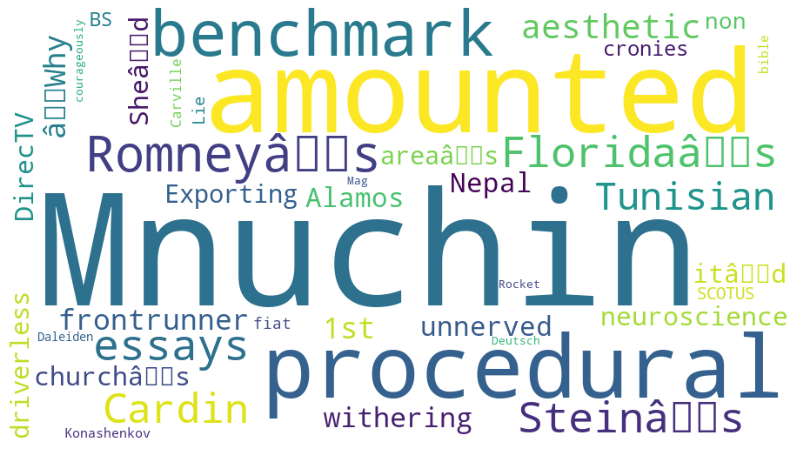

In [205]:
plt.subplots(figsize = (18,8))
wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(dif_true)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

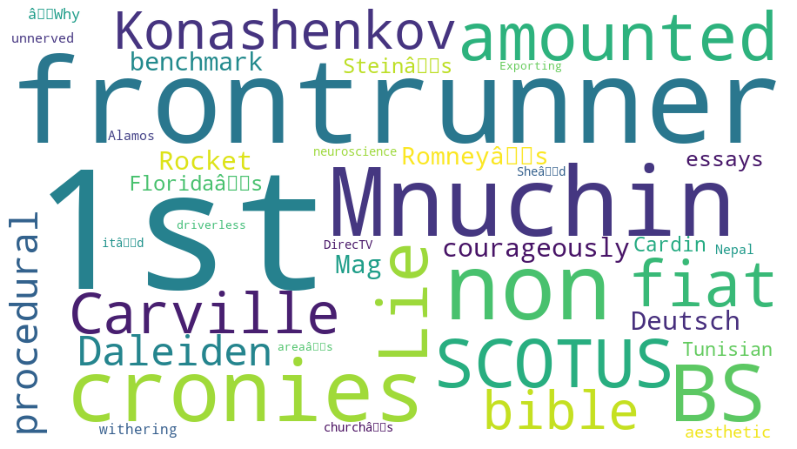

In [206]:
plt.subplots(figsize = (18,8))
wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(dif_false)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# all

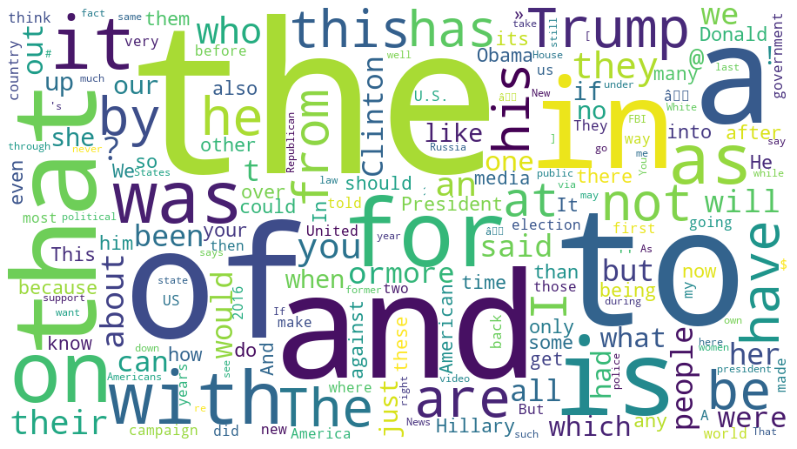

In [207]:
plt.subplots(figsize = (18,8))
wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(all_words_false)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

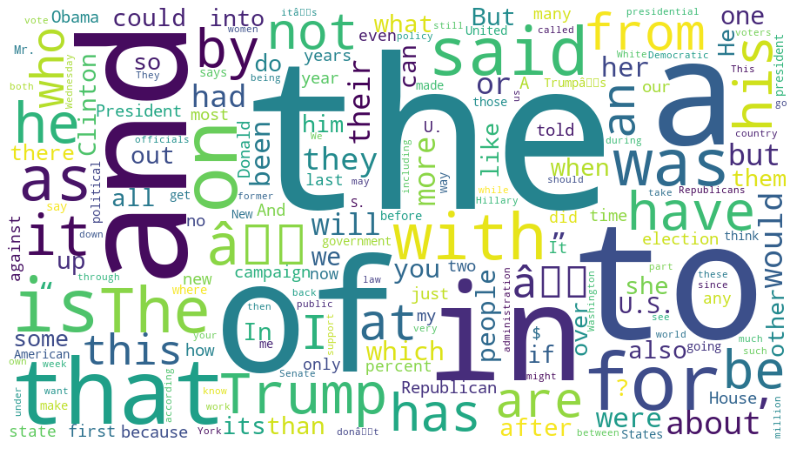

In [208]:
plt.subplots(figsize = (18,8))
wordcloud = WordCloud(width=900, height=500, background_color='white').generate_from_frequencies(all_words_true)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()